<h1 style="background-color: #001f3f; color: #ff0; padding: 12px; border: 2px solid #fff; text-align: center;border-radius: 8px;">Titanic</h1>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, skew, probplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score

# EDA - Exploratory Data Analysis

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
cat_cols = train.select_dtypes(include=['object']).columns

num_cols = train.select_dtypes(include=['int64', 'float64'])

for feature in num_cols:
    zero_values = (train[feature] == 0).sum()
    null_values = train[feature].isnull().sum()
    unique_values = len(train[feature].unique())

    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("="*30)

Feature: PassengerId
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 891
Feature: Survived
Number of 0 Values: 549
Number of Null Values: 0
Unique Values: 2
Feature: Pclass
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 3
Feature: Age
Number of 0 Values: 0
Number of Null Values: 177
Unique Values: 89
Feature: SibSp
Number of 0 Values: 608
Number of Null Values: 0
Unique Values: 7
Feature: Parch
Number of 0 Values: 678
Number of Null Values: 0
Unique Values: 7
Feature: Fare
Number of 0 Values: 15
Number of Null Values: 0
Unique Values: 248


# Missing Values

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

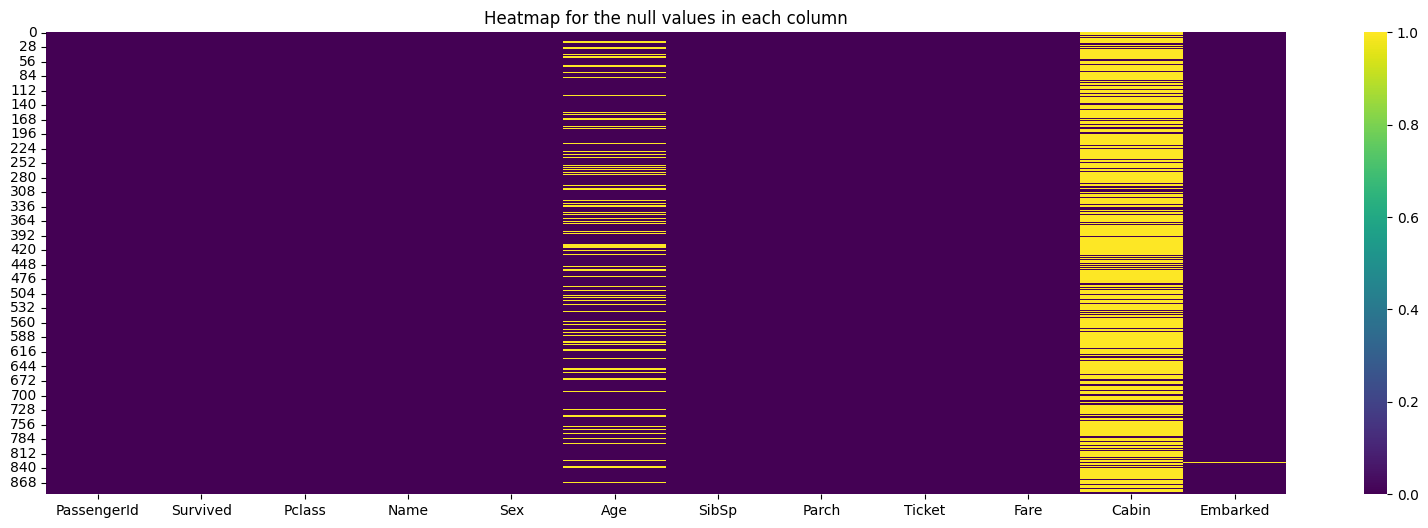

In [9]:
plt.figure(figsize=(20,6))
plt.title('Heatmap for the null values in each column')
sns.heatmap(train.isnull(),cmap='viridis');

In [10]:
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

train['Age'] = train['Age'].fillna(train['Age'].mode()[0])

In [11]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Correlation

In [12]:
corr = num_cols.corr()

# Sort the correlations for the 'Survived' column in descending order
top_corr = corr['Survived'].sort_values(ascending=False)[1:20].to_frame()

# Apply a background gradient to visually represent the correlations using the seaborn library
styled_corr = top_corr.style.background_gradient(axis=1, cmap=sns.light_palette('green', as_cmap=True))#Ciktiyi sns kutuphanesini kullanarak renklendirip gorsellestirdik.

styled_corr

,Survived
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


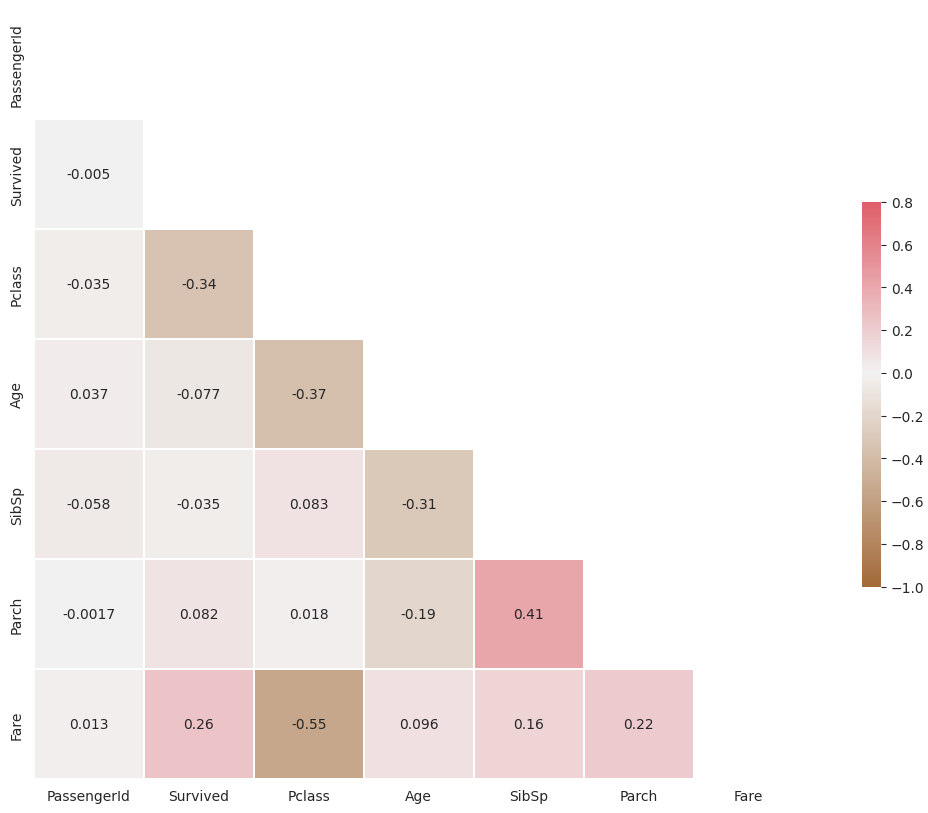

In [13]:

# Create a triangular mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set the color palette
cmap = sns.diverging_palette(40, 10, as_cmap=True)

# Draw the heatmap on a white background
with sns.axes_style('white'):
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(15, 10))

    # Draw the correlation matrix as a heatmap, using the triangular mask
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink': 0.5, 'orientation': 'vertical'}, linewidth=.02)
    
plt.show()

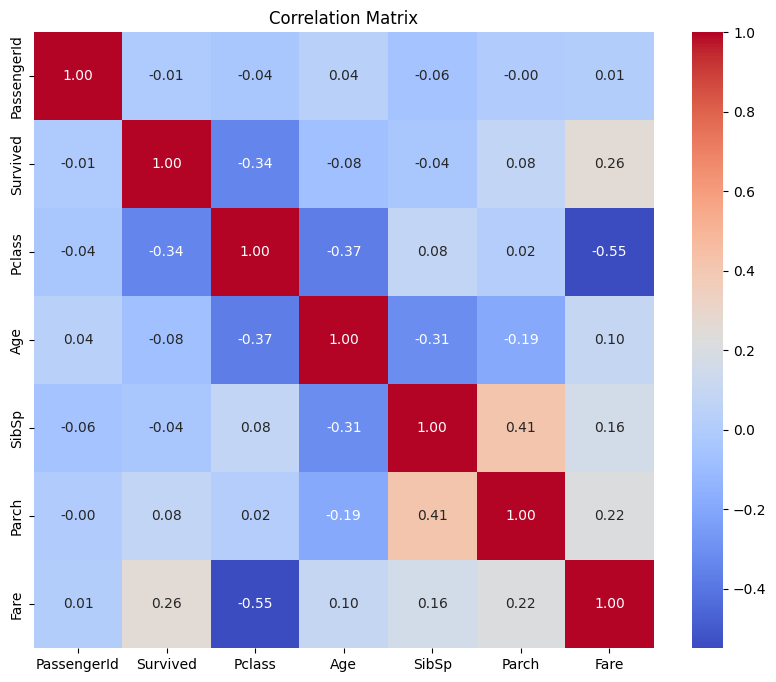

In [14]:
correlation_matrix_num = num_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_num, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Outlier

**In the outlier section, we can investigate outliers for 'Age' and 'Fare'. I anticipate that age is unlikely to exhibit outliers; therefore, I am solely examining the 'Fare' column for any potential outliers.**

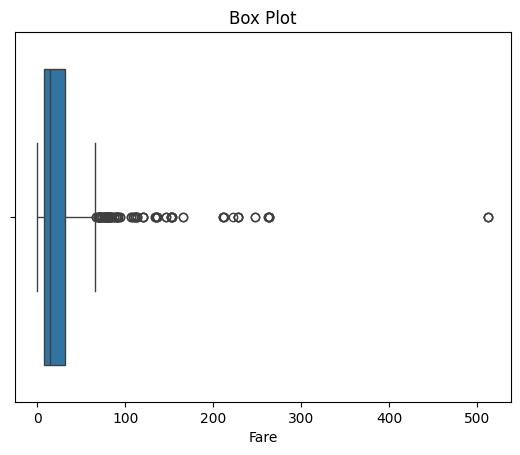

In [15]:
sns.boxplot(data=train, x="Fare")
plt.title('Box Plot')

plt.show()

In [16]:
train.query('Fare > 500')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B96 B98,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [17]:
z_scores = stats.zscore(train['Fare'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
outlier_indices = np.where(outliers)[0]

outlier_values = train['Fare'].iloc[outlier_indices]
sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)

print(sorted_outlier_values_descending)

258    512.3292
679    512.3292
737    512.3292
27     263.0000
341    263.0000
438    263.0000
88     263.0000
311    262.3750
742    262.3750
118    247.5208
299    247.5208
716    227.5250
380    227.5250
557    227.5250
700    227.5250
527    221.7792
377    211.5000
730    211.3375
689    211.3375
779    211.3375
Name: Fare, dtype: float64


In [18]:
train.drop([258, 679, 737],axis=0,inplace=True)

# Visualizations

**I am visualizing the data to understand it better.**

## Fare-Pclass

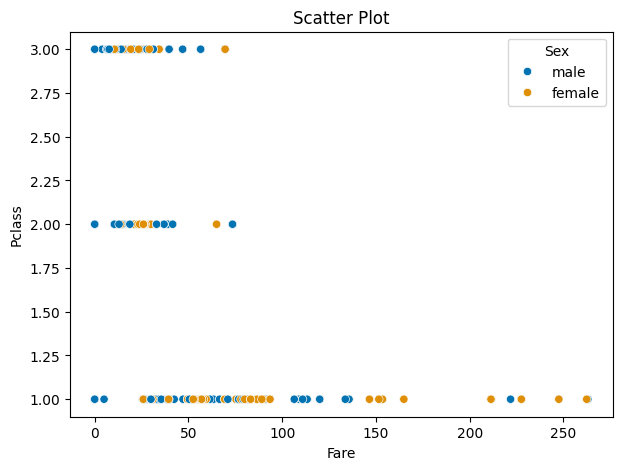

In [19]:
plt.figure(figsize=(7, 5), dpi=100)

# Scatter plot
sns.scatterplot(data=train, x="Fare", y="Pclass", hue="Sex", palette="colorblind")
plt.title('Scatter Plot')

plt.show()

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

## Fare-Survived

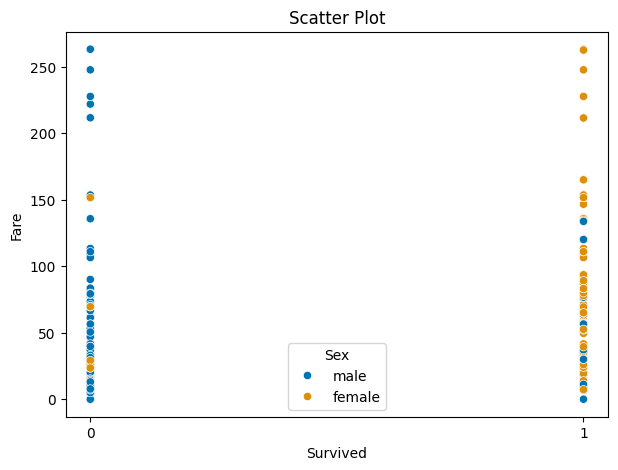

In [20]:
plt.figure(figsize=(7, 5), dpi=100)

# Scatter plot
sns.scatterplot(data=train, x="Survived", y="Fare", hue="Sex", palette="colorblind")
plt.title('Scatter Plot')
plt.xticks([0, 1])

plt.show()

## Gender Distribution

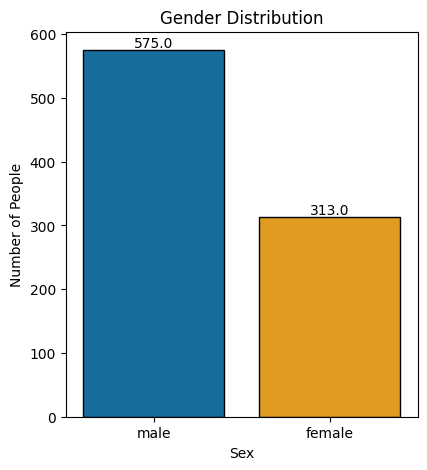

In [21]:
# Calculate the total number of men and women
total_male = (train['Sex'] == 'male').sum()
total_female = (train['Sex'] == 'female').sum()

# Let's create a histogram of the total number of men and women
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=train, hue='Sex', palette={"male": sns.color_palette("colorblind")[0], "female": "orange"}, edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of People')

for patch in plt.gca().patches:
    height = patch.get_height()
    plt.gca().annotate(f'{height}', (patch.get_x() + patch.get_width() / 2., height),
                       ha='center', va='bottom')

plt.show()

## Gender Distribution of Survivors vs. Non-survivors

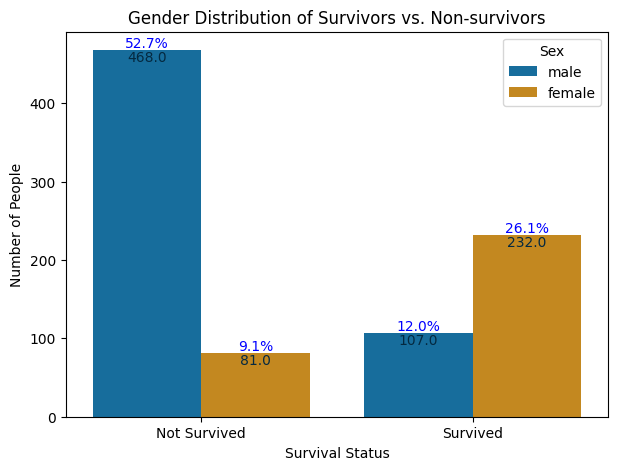

In [22]:
plt.figure(figsize=(7, 5), dpi=100)

# Bar plot
sns.countplot(data=train, x='Survived', hue='Sex', palette='colorblind')
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)
plt.title('Gender Distribution of Survivors vs. Non-survivors')

total_counts = train['Survived'].value_counts()  
total_people = len(train) 

for patch in plt.gca().patches:
    height = patch.get_height()
    if height != 0:  
        total = total_counts[int(patch.get_x())] 
        percentage = (height / total_people) * 100
        plt.gca().annotate(f'{percentage:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                           ha='center', va='bottom', color='blue')
        plt.gca().annotate(f'{height}', (patch.get_x() + patch.get_width() / 2., height),
                           ha='center', va='top', color='#042940')

plt.show()


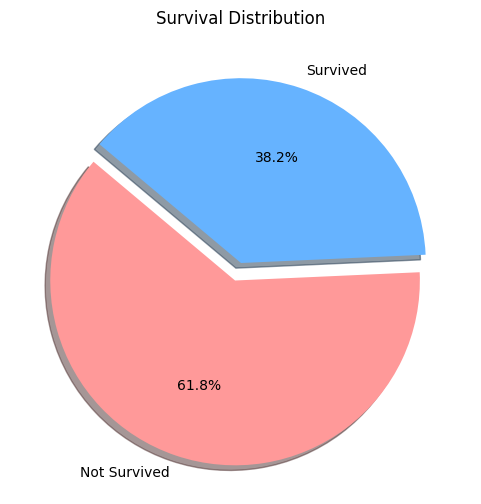

In [23]:
survived_counts = train['Survived'].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
explode = (0.1, 0)
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'], explode=explode, shadow=True)
plt.title('Survival Distribution')
plt.show()

# Skewness


 mu = 30.58 and sigma = 41.15



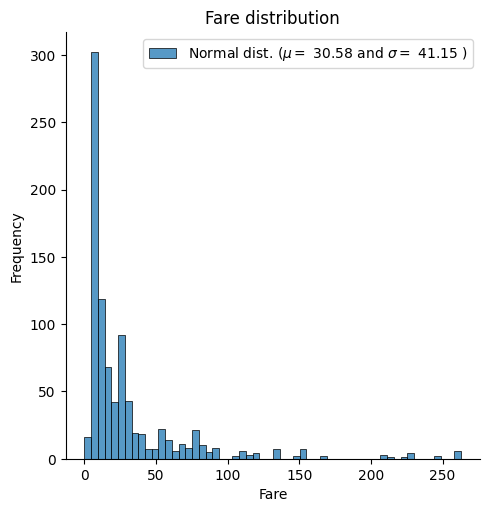

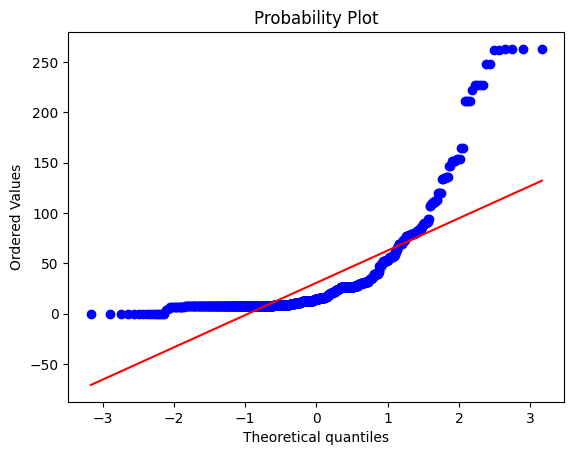

In [24]:
# 'Fare' Histogram
sns.displot(train['Fare'], kde_kws={'fit': norm})

# I calculate mu and sigma values
(mu, sigma) = norm.fit(train['Fare'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# for the top part of the histogram
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

# QQ-plot
fig, ax = plt.subplots()
probplot(train['Fare'], plot=ax)
plt.show()


 mu = 2.95 and sigma = 0.95



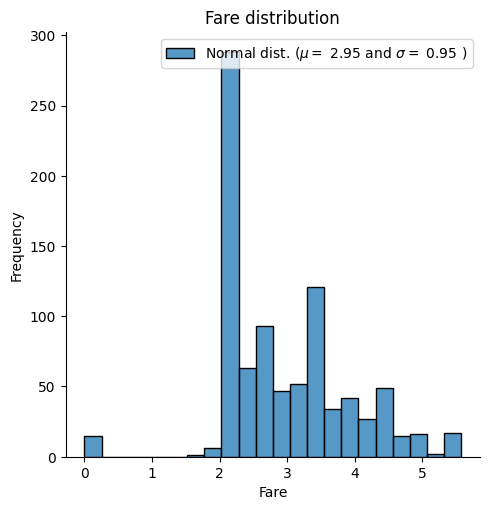

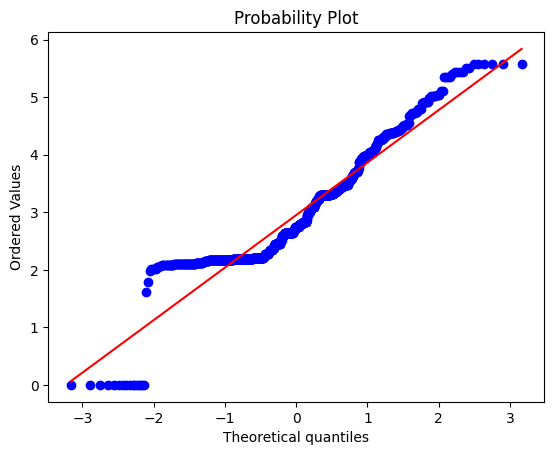

In [25]:
#Log-Transform
train["Fare"] = np.log1p(train["Fare"])

# 'Fare' Histogram
sns.displot(train['Fare'], kde_kws={'fit': norm})

# I calculate mu and sigma values
(mu, sigma) = norm.fit(train['Fare'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# for the top part of the histogram
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

# QQ-plot
fig, ax = plt.subplots()
probplot(train['Fare'], plot=ax)
plt.show()

# Encode

In [26]:
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

**I am dropping the columns I won't use.**

In [27]:
train.drop(columns=['Name', 'PassengerId', 'Ticket','Cabin'], inplace=True)

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       888 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB


In [30]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
ccol = train.dtypes[train.dtypes == "object"].index
ccol

Index(['Sex', 'Embarked'], dtype='object')

In [33]:
#One-Hot Encoding
print("Before")
print(train.shape)
train = pd.get_dummies(train).astype(int)
print("After")
print(train.shape)

Before
(888, 8)
After
(888, 11)


In [34]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,2,0,1,0,0,1
1,1,1,38,1,0,4,1,0,1,0,0
2,1,3,26,0,0,2,1,0,0,0,1
3,1,1,35,1,0,3,1,0,0,0,1
4,0,3,35,0,0,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,2,0,1,0,0,1
887,1,1,19,0,0,3,1,0,0,0,1
888,0,3,24,1,2,3,1,0,0,0,1
889,1,1,26,0,0,3,0,1,1,0,0


**I copy the training data for each model so that I can compare all accuracies in a single data frame.**

In [35]:
Decision_Tree = train.copy()
Logistic_Regression = train.copy()
KNN = train.copy()
SVM = train.copy()
Random_Forest = train.copy()
XGBoost = train.copy()


## Spliting the dataset

In [36]:
X = Decision_Tree.drop("Survived", axis=1)
y = Decision_Tree["Survived"]

In [37]:
y.value_counts()

Survived
0    549
1    339
Name: count, dtype: int64

**I need the target variable to be equally distributed, so I'm using 'stratify=y' to balance it.**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# models = {
#     "Decision Tree": DecisionTreeClassifier(),
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "KNN": KNeighborsClassifier(),
#     "SVM": SVC(),
#     "Random Forest": RandomForestClassifier(),
#     "XGBoost": XGBClassifier()
# }

# # Dictionary to store the best parameters and best accuracy scores for each model
# best_params_and_scores = {}

# # Creating GridSearchCV for each model and finding the best parameters
# param_grids = {
#     "Decision Tree": {
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [None, 5, 10, 15, 20],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     "Logistic Regression": {
#         'C': [0.001, 0.01, 0.1, 1, 10, 100],
#         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#     },
#     "KNN": {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#     },
#     "SVM": {
#         'C': [0.1, 1, 10, 100],
#         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#         'gamma': ['scale', 'auto']
#     },
#     "Random Forest": {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 5, 10, 15, 20],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     "XGBoost": {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [3, 5, 7, 9],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'subsample': [0.5, 0.7, 0.9],
#         'colsample_bytree': [0.5, 0.7, 0.9]
#     }
# }

# for model_name, model in models.items():
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5)
#     grid_search.fit(X_train, y_train)
    
#     best_params_and_scores[model_name] = {
#         'best_params': grid_search.best_params_,
#         'best_score': grid_search.best_score_
#     }

#     accuracy = grid_search.best_estimator_.score(X_test, y_test)
    
#     print(f"Best parameters for {model_name}: {grid_search.best_params_}")
#     print(f"Best training score for {model_name}: {grid_search.best_score_}")
#     print(f"Test score for {model_name}: {accuracy}\n")

# print("Best parameters and scores for all models:")
# print(best_params_and_scores)


## Decision Tree 

In [40]:
from sklearn.tree import DecisionTreeClassifier

classifier_decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf=1, min_samples_split=10)

classifier_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [41]:
cv_scores_decision_tree = cross_val_score(classifier_decision_tree, X, y, cv=5)

print("Cross-validation scores:", cv_scores_decision_tree)
print("Mean CV accuracy:", cv_scores_decision_tree.mean())

Cross-validation scores: [0.82022472 0.75280899 0.80898876 0.79096045 0.85875706]
Mean CV accuracy: 0.8063479972068812


In [42]:
y_pred_decision = classifier_decision_tree.predict(X_test)

In [43]:
accuracy_decision = accuracy_score(y_test, y_pred_decision)
print("Accuracy:", accuracy_decision)

precision = precision_score(y_test, y_pred_decision)
recall = recall_score(y_test, y_pred_decision)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_decision)
print("F1 Score:", f1)

Accuracy: 0.7921348314606742
Precision: 0.8444444444444444
Recall: 0.5588235294117647
F1 Score: 0.672566371681416


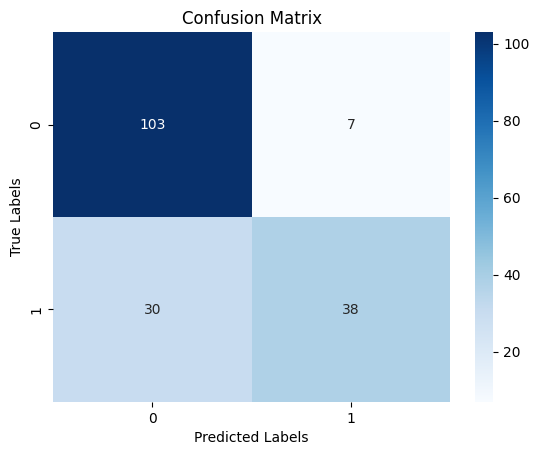

In [44]:
cm = confusion_matrix(y_test, y_pred_decision)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

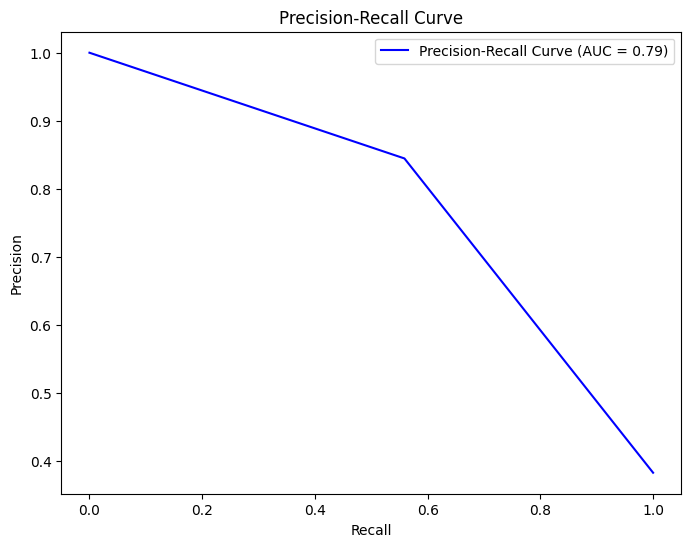

In [45]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_decision)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

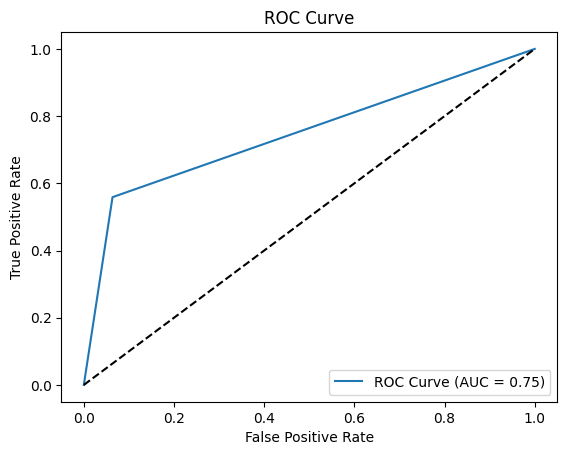

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
auc = roc_auc_score(y_test, y_pred_decision)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

In [47]:
X = Logistic_Regression.drop("Survived", axis=1)
y = Logistic_Regression["Survived"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression

classifier_logistic_regression = LogisticRegression(C=2, solver='newton-cg')

classifier_logistic_regression.fit(X_train, y_train)

LogisticRegression(C=2, solver='newton-cg')

In [51]:
cv_scores_logistic_regression = cross_val_score(classifier_logistic_regression, X, y, cv=5)

print("Cross-validation scores:", cv_scores_logistic_regression)
print("Mean CV accuracy:", cv_scores_logistic_regression.mean())

Cross-validation scores: [0.79213483 0.78651685 0.79213483 0.76836158 0.81920904]
Mean CV accuracy: 0.7916714276645719


In [52]:
y_pred_logistic = classifier_logistic_regression.predict(X_test)

In [53]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)

precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_logistic)
print("F1 Score:", f1)

Accuracy: 0.8202247191011236
Precision: 0.78125
Recall: 0.7352941176470589
F1 Score: 0.7575757575757576


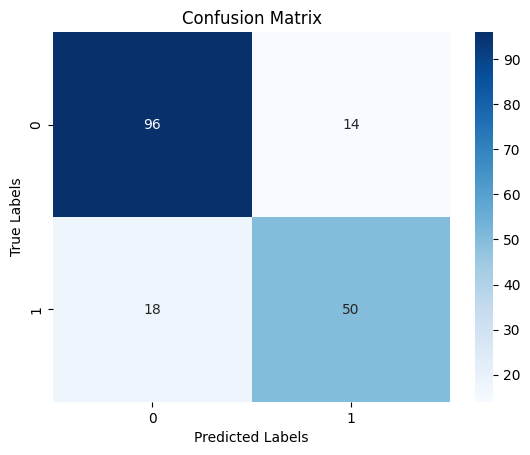

In [54]:
cm = confusion_matrix(y_test, y_pred_logistic)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

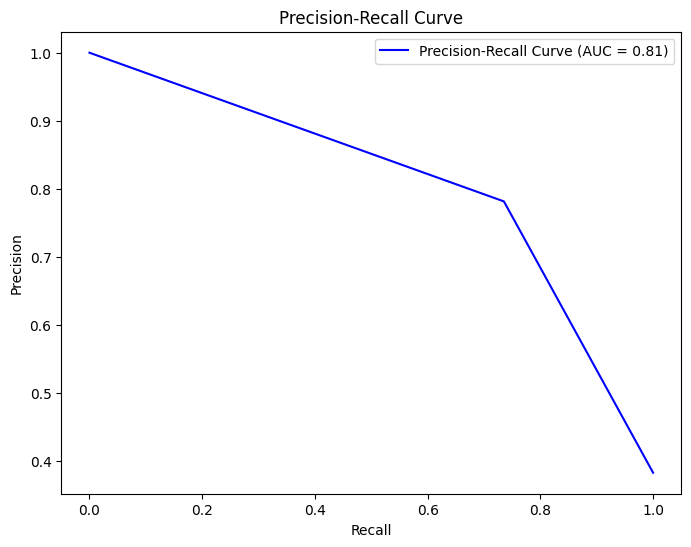

In [55]:
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test, y_pred_logistic)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

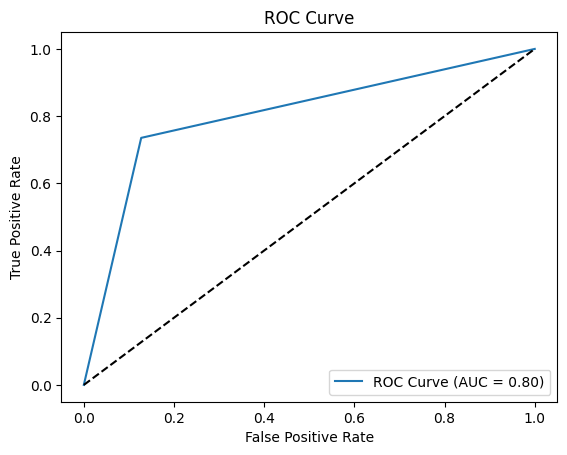

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic)
auc = roc_auc_score(y_test, y_pred_logistic)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## KNN

In [57]:
X = KNN.drop("Survived", axis=1)
y = KNN["Survived"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(algorithm='auto',n_neighbors = 5, metric = 'euclidean', weights='uniform')

classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [61]:
cv_scores_knn = cross_val_score(classifier_knn, X, y, cv=5)

print("Cross-validation scores:", cv_scores_knn)
print("Mean CV accuracy:", cv_scores_knn.mean())

Cross-validation scores: [0.75280899 0.80337079 0.7752809  0.81920904 0.81920904]
Mean CV accuracy: 0.7939757506506696


In [62]:
y_pred_KNN = classifier_knn.predict(X_test)

In [63]:
accuracy_knn = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy_knn)

precision = precision_score(y_test, y_pred_KNN)
recall = recall_score(y_test, y_pred_KNN)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_KNN)
print("F1 Score:", f1)

Accuracy: 0.7921348314606742
Precision: 0.7540983606557377
Recall: 0.6764705882352942
F1 Score: 0.7131782945736433


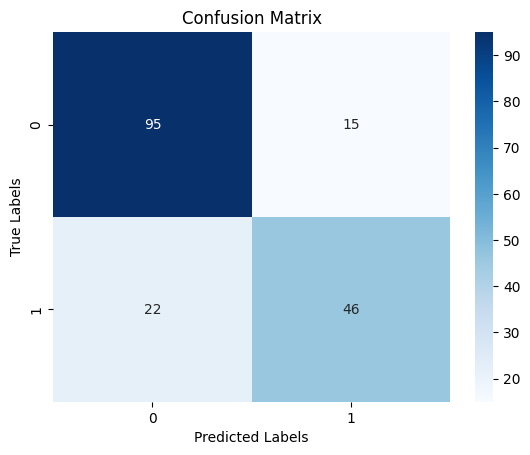

In [64]:
cm = confusion_matrix(y_test, y_pred_KNN)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

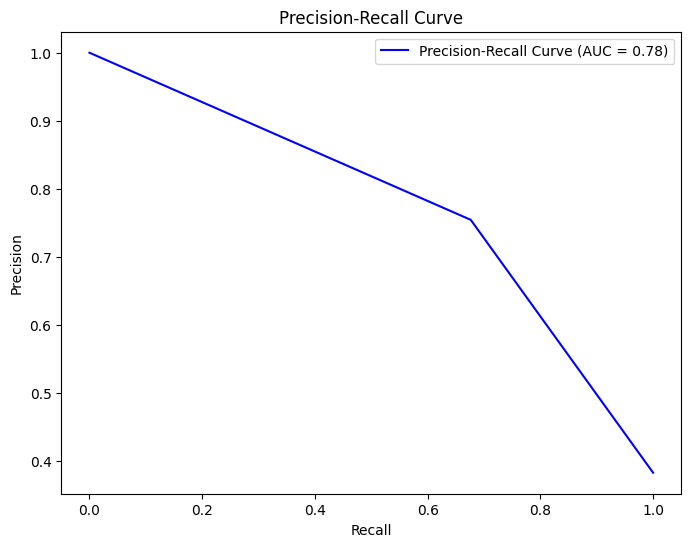

In [65]:
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test, y_pred_KNN)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

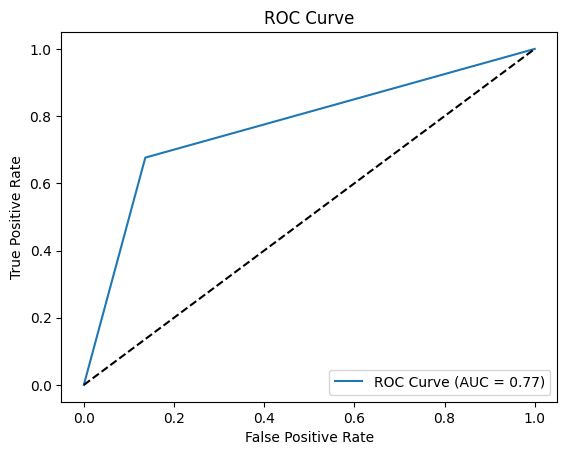

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_KNN)
auc = roc_auc_score(y_test, y_pred_KNN)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## SVM

In [67]:
X = SVM.drop("Survived", axis=1)
y = SVM["Survived"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [70]:
from sklearn.svm import SVC
classifier_svm = SVC(C=10,gamma='auto', kernel='rbf')

classifier_svm.fit(X_train, y_train)

SVC(C=10, gamma='auto')

In [71]:
cv_scores_svm = cross_val_score(classifier_svm, X, y, cv=5)

print("Cross-validation scores:", cv_scores_svm)
print("Mean CV accuracy:", cv_scores_svm.mean())

Cross-validation scores: [0.76966292 0.79213483 0.79775281 0.80225989 0.8079096 ]
Mean CV accuracy: 0.7939440106646354


In [72]:
y_pred_svm = classifier_svm.predict(X_test)

In [73]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_svm)
print("F1 Score:", f1)

Accuracy: 0.7865168539325843
Precision: 0.734375
Recall: 0.6911764705882353
F1 Score: 0.7121212121212122


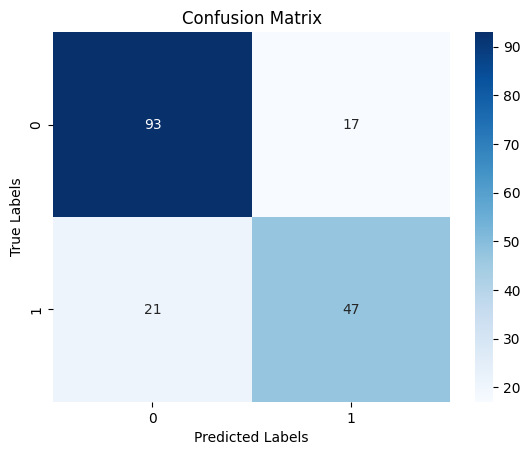

In [74]:
cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

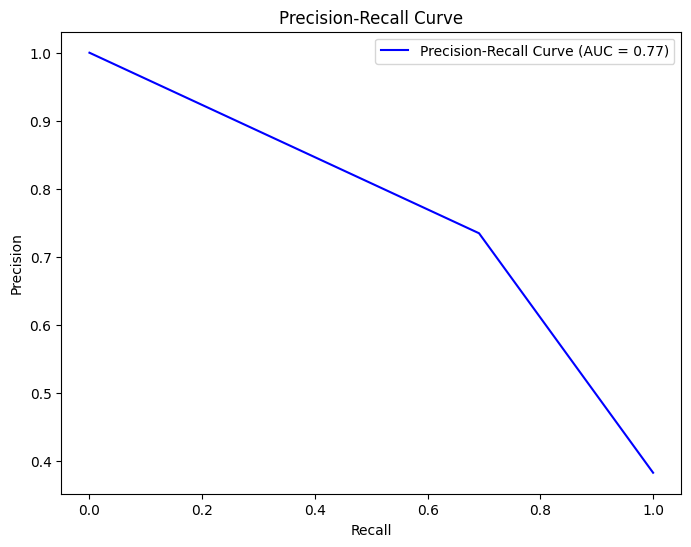

In [75]:
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test, y_pred_svm)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

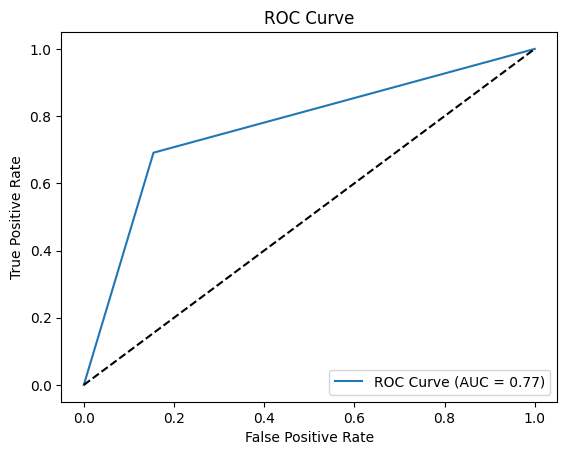

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
auc = roc_auc_score(y_test, y_pred_svm)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier

In [77]:
X = Random_Forest.drop("Survived", axis=1)
y = Random_Forest["Survived"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [79]:
from sklearn.ensemble import RandomForestClassifier

classifier_forest = RandomForestClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=5,n_estimators=300, random_state=0)

classifier_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=300,
                       random_state=0)

In [80]:
cv_scores_forest = cross_val_score(classifier_forest, X, y, cv=5)

print("Cross-validation scores:", cv_scores_forest)
print("Mean CV accuracy:", cv_scores_forest.mean())

Cross-validation scores: [0.80898876 0.8258427  0.82022472 0.80225989 0.86440678]
Mean CV accuracy: 0.8243445692883895


In [81]:
y_pred_forest = classifier_forest.predict(X_test)

In [82]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy_forest)

precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_forest)
print("F1 Score:", f1)

Accuracy: 0.8314606741573034
Precision: 0.8275862068965517
Recall: 0.7058823529411765
F1 Score: 0.7619047619047619


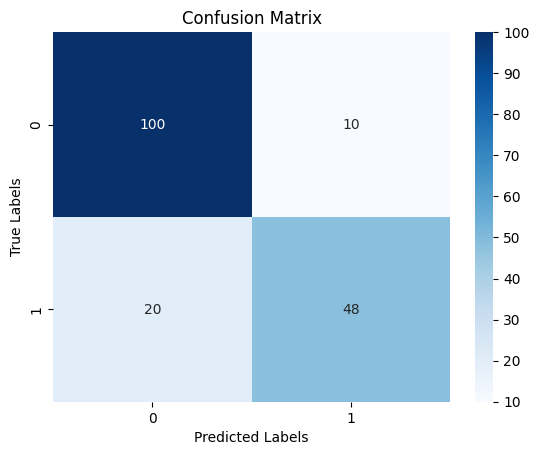

In [83]:
cm = confusion_matrix(y_test, y_pred_forest)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

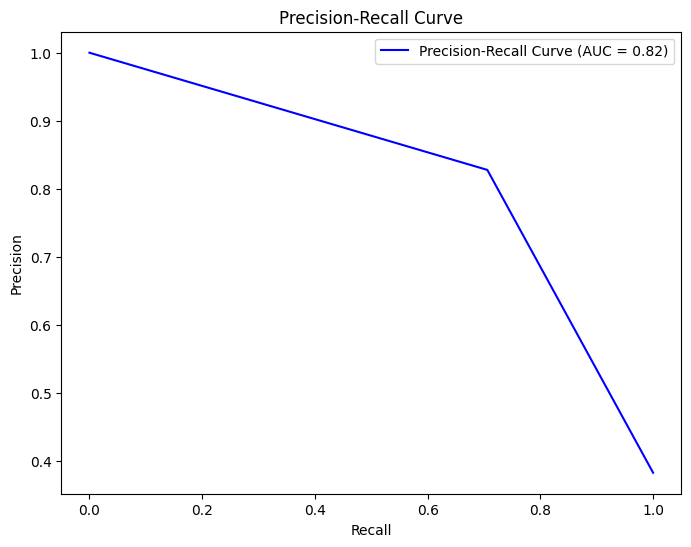

In [84]:
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test, y_pred_forest)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

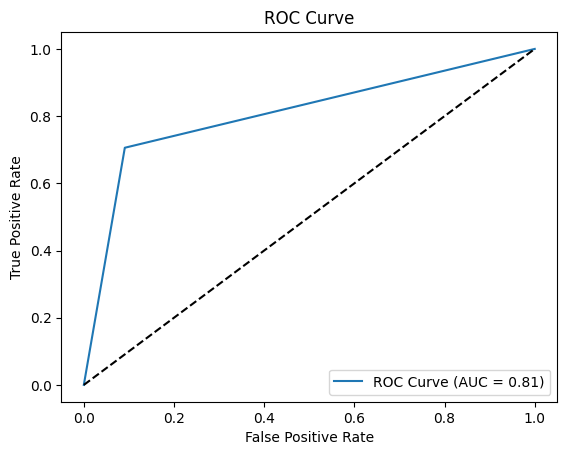

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_forest)
auc = roc_auc_score(y_test, y_pred_forest)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## XGBoost Classifier

In [86]:
X = XGBoost.drop("Survived", axis=1)
y = XGBoost["Survived"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(colsample_bytree= 0.5, learning_rate= 0.01, max_depth= 3, min_child_weight= 5, n_estimators= 200, subsample= 0.9)

classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
cv_scores_xgb = cross_val_score(classifier_xgb, X, y, cv=5)

print("Cross-validation scores:", cv_scores_xgb)
print("Mean CV accuracy:", cv_scores_xgb.mean())

Cross-validation scores: [0.83146067 0.81460674 0.82022472 0.79096045 0.83615819]
Mean CV accuracy: 0.8186821557798515


In [90]:
y_pred_xgb = classifier_xgb.predict(X_test)

In [91]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_xgb)
print("F1 Score:", f1)

Accuracy: 0.8089887640449438
Precision: 0.8695652173913043
Recall: 0.5882352941176471
F1 Score: 0.7017543859649124


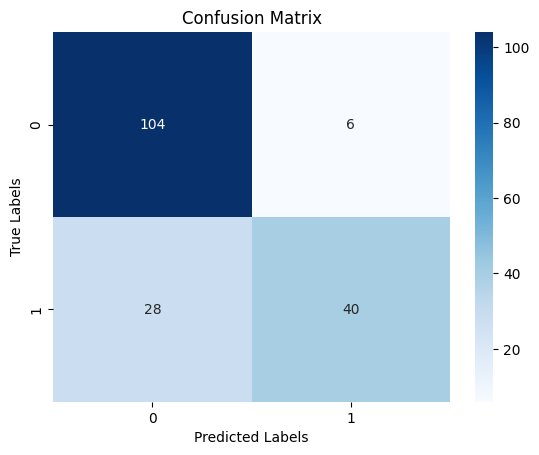

In [92]:
cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

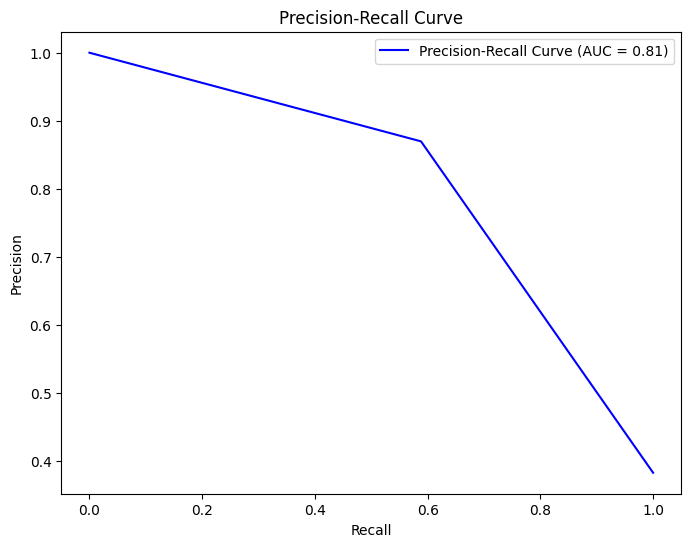

In [93]:
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

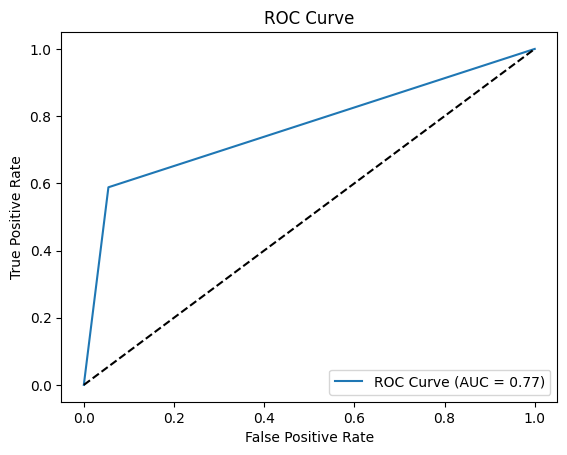

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_xgb)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Accuracy of all models

In [95]:
accuracy_scores = {
    "Decision Tree": accuracy_decision,
    "Logistic Regression": accuracy_logistic,
    "KNN": accuracy_knn, 
    "SVM": accuracy_svm,
    "Random Forest": accuracy_forest,   
    "XGBoost": accuracy_xgb
}

In [96]:
accuracy_df = pd.DataFrame(accuracy_scores.items(), columns=["Model", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)
accuracy_df

,Model,Accuracy
4,Random Forest,0.831461
1,Logistic Regression,0.820225
5,XGBoost,0.808989
0,Decision Tree,0.792135
2,KNN,0.792135
3,SVM,0.786517


# Test(Unseen)

In [97]:
test = pd.read_csv('titanic_test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Unseen Null Values

In [98]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [99]:
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].mode()[0])

test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

test['Age'] = test['Age'].fillna(test['Age'].mode()[0])

In [100]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Test Skewness


 mu = 35.56 and sigma = 55.79



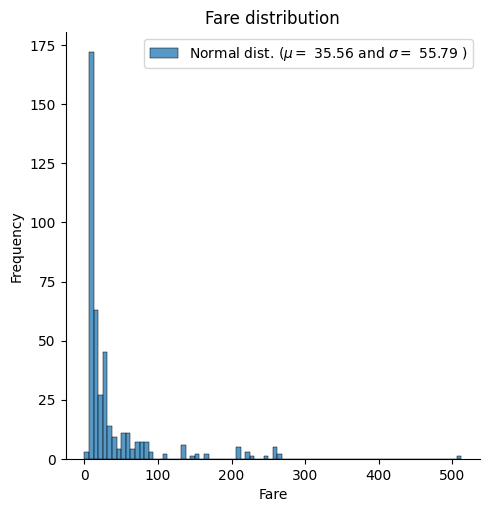

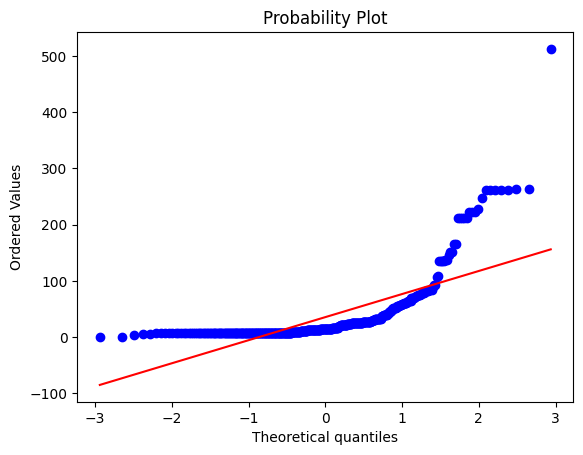

In [101]:
# 'Fare' Histogram
sns.displot(test['Fare'], kde_kws={'fit': norm})

# I calculate mu and sigma values
(mu, sigma) = norm.fit(test['Fare'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# for the top part of the histogram
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

# QQ-plot
fig, ax = plt.subplots()
probplot(test['Fare'], plot=ax)
plt.show()


 mu = 3.01 and sigma = 0.97



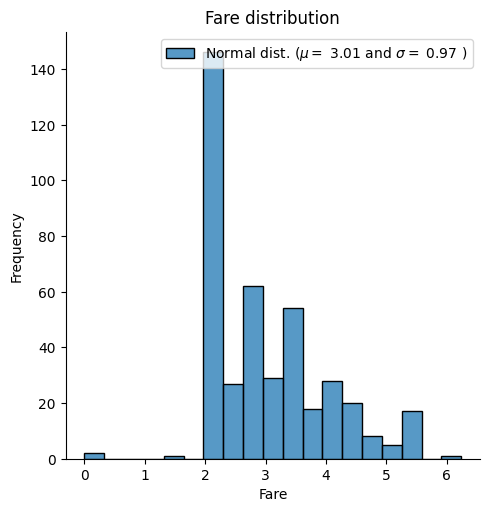

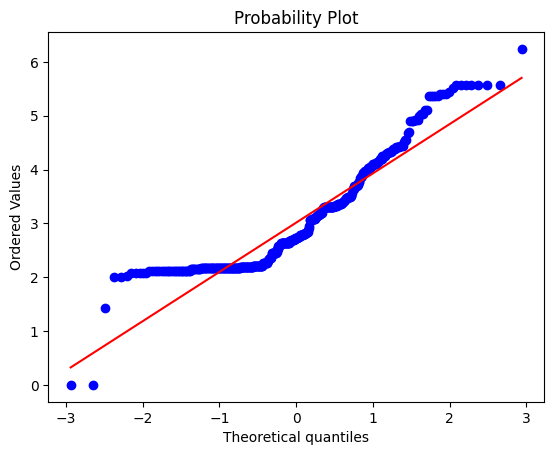

In [102]:
# Log-Transform
test["Fare"] = np.log1p(test["Fare"])

# 'Fare' Histogram
sns.displot(test['Fare'], kde_kws={'fit': norm})

# I calculate mu and sigma values
(mu, sigma) = norm.fit(test['Fare'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# for the top part of the histogram
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

# QQ-plot
fig, ax = plt.subplots()
probplot(test['Fare'], plot=ax)
plt.show()

## Test Encoding

**I will use the id from the test dataset for submission, so I'm saving them. Afterwards, I am dropping the 'PassengerId' column.**

In [103]:
id = test['PassengerId']

In [104]:
test.drop(columns=['Name', 'PassengerId', 'Ticket','Cabin'], inplace=True)

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [106]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,2.178064,Q
1,3,female,47.0,1,0,2.079442,S
2,2,male,62.0,0,0,2.369075,Q
3,3,male,27.0,0,0,2.268252,S
4,3,female,22.0,1,1,2.586824,S
...,...,...,...,...,...,...,...
413,3,male,21.0,0,0,2.202765,S
414,1,female,39.0,0,0,4.699571,C
415,3,male,38.5,0,0,2.110213,S
416,3,male,21.0,0,0,2.202765,S


In [107]:
ccol = test.dtypes[test.dtypes == "object"].index
ccol

Index(['Sex', 'Embarked'], dtype='object')

In [108]:
# One-Hot Encoding
print("Before")
print(test.shape)
test = pd.get_dummies(test).astype(int)
print("After")
print(test.shape)

Before
(418, 7)
After
(418, 10)


## Test Predict

In [109]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34,0,0,2,0,1,0,1,0
1,3,47,1,0,2,1,0,0,0,1
2,2,62,0,0,2,0,1,0,1,0
3,3,27,0,0,2,0,1,0,0,1
4,3,22,1,1,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,21,0,0,2,0,1,0,0,1
414,1,39,0,0,4,1,0,1,0,0
415,3,38,0,0,2,0,1,0,0,1
416,3,21,0,0,2,0,1,0,0,1


In [110]:
test_pred = classifier_forest.predict(test)

# Submission

In [111]:
sub = pd.read_csv("titanic_gender_submission.csv")
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [112]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [113]:
id.count()

418

In [114]:
sub = pd.DataFrame()
sub['PassengerId'] = id
sub['Survived'] = test_pred
sub.to_csv('submission3.csv',index=False)